In [1]:
import os
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from modules import train_model, test_model
from dataset import BPDataset
from torch import optim
from torch.optim import lr_scheduler
from datetime import datetime
import pandas as pd
from backbone_models import ResNet18, VGG16
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ppg_dir = '/Users/yeseullee/Documents/ECE271B/PPGBPDatabase/Data File/0_subject'
label_path = '/Users/yeseullee/Documents/ECE271B/PPGBPDatabase/Data File/PPG-BP dataset.csv'

In [5]:
data_mean=2060.61
data_std=285.13
data_normalization = {'mean':data_mean,'std':data_std}

# setup data loader
dataset = BPDataset(ppg_dir, label_path, normalize=data_normalization)
print('dataset: {}'.format(dataset.__len__()))

# Split training data, validation data, testing data
data_train, data_val, data_test = torch.utils.data.random_split(dataset, [415, 104, 129])
print(data_train.__len__())
print(data_val.__len__())
print(data_test.__len__())

{'Normal', 'Stage 2 hypertension', 'Stage 1 hypertension', 'Prehypertension'}
dataset: 648
415
104
129


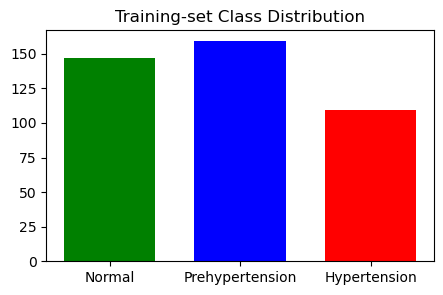

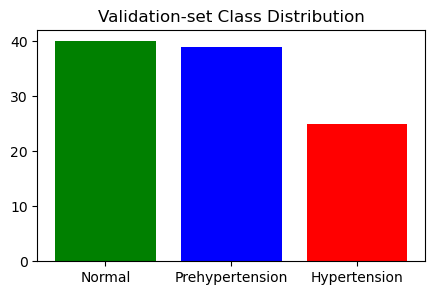

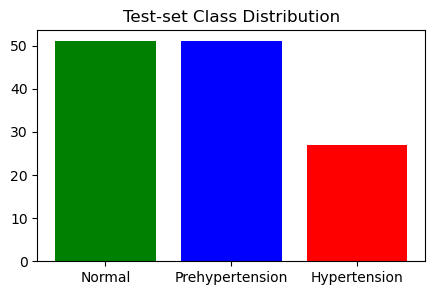

In [6]:
temp_dataloaders={'train': torch.utils.data.DataLoader(data_train,batch_size=1,shuffle=False),
                'val':torch.utils.data.DataLoader(data_val,batch_size=1,shuffle=False),
                'test':torch.utils.data.DataLoader(data_test,batch_size=1,shuffle=False)}

train_labels=[0,0,0]
for data, label, subject in temp_dataloaders['train']:
    if label.data==0:
        train_labels[0]+=1
    elif label.data==1:
        train_labels[1]+=1
    else:
        train_labels[2]+=1

plt.figure(figsize=(5,3))
plt.bar(np.arange(3),train_labels,color=['g','b','r'],width=0.7)
plt.xticks(np.arange(3),['Normal','Prehypertension','Hypertension'])
plt.title('Training-set Class Distribution')
plt.show()

val_labels=[0,0,0]
for data, label, subject in temp_dataloaders['val']:
    if label.data==0:
        val_labels[0]+=1
    elif label.data==1:
        val_labels[1]+=1
    else:
        val_labels[2]+=1

plt.figure(figsize=(5,3))
plt.bar(np.arange(3),val_labels,color=['g','b','r'])
plt.xticks(np.arange(3),['Normal','Prehypertension','Hypertension'])
plt.title('Validation-set Class Distribution')
plt.show()

test_labels=[0,0,0]
for data, label, subject in temp_dataloaders['test']:
    if label.data==0:
        test_labels[0]+=1
    elif label.data==1:
        test_labels[1]+=1
    else:
        test_labels[2]+=1

plt.figure(figsize=(5,3))
plt.bar(np.arange(3),test_labels,color=['g','b','r'])
plt.xticks(np.arange(3),['Normal','Prehypertension','Hypertension'])
plt.title('Test-set Class Distribution')
plt.show()


In [7]:
dataloaders={'train': torch.utils.data.DataLoader(data_train,batch_size=10,shuffle=True),
                'val':torch.utils.data.DataLoader(data_val,batch_size=10,shuffle=True),
                'test':torch.utils.data.DataLoader(data_test,batch_size=10,shuffle=False)}
dataset_sizes = {'train': data_train.__len__(),
                    'val':data_val.__len__(),
                    'test':data_test.__len__()}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device:',device)

Device: cpu


In [15]:
model=ResNet18(3)
model=model.to(device)

In [ ]:
learning_rate=0.0001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.2)
trained_model,trained_model_later=train_model(model, criterion, optimizer, exp_lr_scheduler, dataloaders, dataset_sizes, device, num_epochs=50)

Epoch 0/49
----------
train Loss: 1.1287 Acc: 0.3880
val Loss: 1.1590 Acc: 0.3750

Epoch 1/49
----------
train Loss: 1.0621 Acc: 0.4169
val Loss: 1.1097 Acc: 0.3750

Epoch 2/49
----------
train Loss: 1.0643 Acc: 0.4048
val Loss: 1.1134 Acc: 0.3942

Epoch 3/49
----------
train Loss: 1.0203 Acc: 0.4410
val Loss: 1.1368 Acc: 0.4231

Epoch 4/49
----------
train Loss: 1.0185 Acc: 0.4819
val Loss: 1.1035 Acc: 0.3750

Epoch 5/49
----------
train Loss: 0.9841 Acc: 0.5036
val Loss: 1.0789 Acc: 0.3750

Epoch 6/49
----------
train Loss: 0.9321 Acc: 0.5687
val Loss: 1.2437 Acc: 0.4519

Epoch 7/49
----------
train Loss: 0.8846 Acc: 0.5639
val Loss: 1.3640 Acc: 0.3750

Epoch 8/49
----------
train Loss: 0.7329 Acc: 0.7012
val Loss: 1.3502 Acc: 0.3846

Epoch 9/49
----------
train Loss: 0.7118 Acc: 0.6795
val Loss: 1.3677 Acc: 0.3654

Epoch 10/49
----------
train Loss: 0.4988 Acc: 0.8169
val Loss: 1.4111 Acc: 0.3750

Epoch 11/49
----------
train Loss: 0.3503 Acc: 0.8916
val Loss: 1.3530 Acc: 0.3654

Ep